In [19]:
# !pip install -r ../../prosodic/requirements.txt
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../../hashstash')
sys.path.insert(0,'../../prosodic')
from tqdm.auto import tqdm
tqdm.pandas()
from multiprompt import *
# !pip install rapidfuzz
from rapidfuzz import fuzz
import numpy as np
import prosodic
stash = HashStash('rhyme_txt', engine='pairtree', serializer='pickle', compress=False)
# stash.clear()
import plotnine as p9

In [20]:
CORPUS_ROOT = os.path.expanduser('~/lltk_data/corpora/chadwyck_poetry')

def get_chadwyck_corpus(ybin=50):
    df = pd.read_csv(os.path.join(CORPUS_ROOT, 'metadata.csv'))
    df=df.query(f'1600<=author_dob<2000')
    df['ybin'] = df.author_dob.apply(lambda x: f'b. {x//ybin*ybin:.0f}-{x//ybin*ybin+ybin:.0f}')
    return df.set_index('id')

df_meta = get_chadwyck_corpus(ybin=100)
df_meta.ybin.value_counts()

ybin
b. 1800-1900    118466
b. 1700-1800     58259
b. 1900-2000     56198
b. 1600-1700     26387
Name: count, dtype: int64

In [21]:
df=pd.read_pickle('data.output.gen_poems.v3.pkl')
len(df)

141886

In [22]:
df['line_sim'] = df.progress_apply(lambda row: fuzz.ratio(row.line_real.strip(), row.line_gen.strip()) if row.line_gen and row.line_real else np.nan, axis=1)

  0%|          | 0/141886 [00:00<?, ?it/s]

In [23]:
df.groupby(['_id','_model']).max(numeric_only=True).sort_values('line_sim').tail(25)

,,stanza_num,line_num,line_sim
_id,_model,,,
english/baylynat/Z300274990,ollama/olmo2:latest,3,15,100.0
english/wattsisa/Z300522501,deepseek/deepseek-chat,5,20,100.0
english/speedsam/Z200495734,deepseek/deepseek-chat,1,20,100.0
english/miscell3/Z200440994,gpt-3.5-turbo,4,16,100.0
english/swinburn/Z300502729,ollama/olmo2:latest,4,16,100.0
c20-english/ep17001/Z300302650,deepseek/deepseek-chat,1,9,100.0
english/wattsisa/Z300523058,deepseek/deepseek-chat,1,10,100.0
english/goldsmit/Z200379906,deepseek/deepseek-chat,1,20,100.0
english/wallered/Z200516940,deepseek/deepseek-chat,3,12,100.0


In [24]:
df.query('_id=="english/sackvil2/Z200480105" & _model=="deepseek/deepseek-chat"').sort_values('line_sim',ascending=False)

stanza_num  line_num                               line_real                                   line_gen  \
_id                         _first_n_lines _model                 _version _timestamp                                                                                                              
english/sackvil2/Z200480105 5              deepseek/deepseek-chat 1        1.742122e+09           2         6               The censure of the grave,                The censure of the grave,     
                                                                           1.742122e+09           2         8              Your heart is but a slave.               Your heart is but a slave.     
                                                                           1.742122e+09           3        10                   And never will submit                    And never will submit     
                                                                           1.742122e+09           3        11       To let that fop, discretion, ride        To let that fop, discretion, ride     
                                                                           1.742122e+09           2         7        For all the tyrants in your eyes        For all the tyrants in your eyes,     
                                                                           1.742122e+09           3         9          My love is full of noble pride          My love is full of noble pride,     
                                                                           1.742122e+09           3        12                     In triumph over it.                     In triumph over wit.     
                                                                           1.742122e+09           4        16              And leave off loving thee.                You boast of living well.     
                                                                           1.742122e+09           4        13   False friends I have, as well as you,       False to our sex, and to yourself,     
                                                                           1.742122e+09           5        20                    Most miserably wise.                     The follies of a wife.   
                                                                           1.742122e+09           5        19            May I be dull enough to grow   And since we must, let's learn to bear     
                                                                           1.742122e+09           5        18              On what such fools advice,               Of all the sweets of life;     
                                                                           1.742122e+09           4        15            Fame and ambition to pursue,    And while you want the use of wealth,     
                                                                           1.742122e+09           5        17          When I the least belief bestow  Come, let's be wise, and take our share     
                                                                           1.742122e+09           4        14                    Who daily counsel me             You scorn the joys you feel;     
                                                                           1.742122e+09           1         1       Phyllis, for shame let us improve                                              
                                                                           1.742122e+09           1         2                 A thousand several ways                                              
                                                                           1.742122e+09           1         3  These few short minutes stolen by love                                              
                                                                           1.742122e+09           1         4                 From many tedious days.                    

In [25]:
grps=[]
for g,gdf in df.groupby(df.index.names): 
    if gdf.line_sim.max()<95:
        grps.append(gdf)
gdf = random.choice(grps)
len(grps)

9260

In [26]:
df_safe = pd.concat(grps)

In [27]:

@stash.stashed_result
def get_txt_rhyming_data(txt, max_dist=0):
    bad_openings = ['Here is', 'Here\'s a', '**']
    lines1 = txt.split('\n')
    lines = [x for x in lines1 if not any(x.startswith(y) for y in bad_openings)][:1000]
    txt = '\n'.join(lines).strip()
    txt = '\n\n'.join([st for st in txt.split('\n\n') if st.count('\n')])
    poem = prosodic.Text(txt=txt)
    data = {'poem':txt}
    data['num_lines'] = poem.num_lines
    if data['num_lines']:
        rhymes = poem.get_rhyming_lines(max_dist=max_dist)
        rhymeset = set(rhymes.keys()) | set(rhymes.values())
        data['num_rhyming_lines'] = len(rhymeset)
        assert data['num_rhyming_lines'] <= data['num_lines']
        data['perc_rhyming_lines'] = data['num_rhyming_lines'] / data['num_lines'] * 100
    else:
        data['num_rhyming_lines'] = np.nan
        data['perc_rhyming_lines'] = np.nan
    return data

In [46]:
def compare_rhymes(df, keep_first_n_lines=False):
    poem_real = []
    poem_gen = []
    stanza_num = 1
    for i,row in df.iterrows():
        if row.stanza_num != stanza_num:
            poem_real.append('')
            poem_gen.append('')
            stanza_num = row.stanza_num

        if keep_first_n_lines or row.line_gen:
            poem_real.append(row.line_real)
            poem_gen.append(row.line_gen if row.line_gen else row.line_real)

    poem_real = '\n'.join(poem_real).strip()
    poem_gen = '\n'.join(poem_gen).strip()
    
    odx = dict(zip([x[1:] for x in df.index.names], df.index.values[0]))
    
    for k,v in get_txt_rhyming_data(poem_real).items(): odx[k+'_real']=v
    for k,v in get_txt_rhyming_data(poem_gen).items(): odx[k+'_gen']=v
    odx['poem_sim'] = float(gdf.line_sim.mean())
    odx['perc_rhyming_lines_diff'] = odx['perc_rhyming_lines_gen'] - odx['perc_rhyming_lines_real']
    odx['num_rhyming_lines_diff'] = odx['num_rhyming_lines_gen'] - odx['num_rhyming_lines_real']
    odx['ybin'] = df_meta.loc[df.reset_index()._id.iloc[0]].ybin
    return odx

In [47]:
x = compare_rhymes(gdf)
x

{'id': 'modern/car2201/Z300548681',
 'first_n_lines': 5,
 'model': 'ollama/llama3.1:8b',
 'version': 1,
 'timestamp': 1742065699.696171,
 'poem_real': "Of this furious antagonist, which, if I do not, he says, I am told,\nThat he will press me further. I shall be sorry to be forced\nTo answer him, but if people's not considering the matter justly\nShall oblige me to it, I must submit to that stupidity. This fellow's\nNonsense does harm at present, but I think it will rather be\nServiceable to our design at last. I cannot determine whither to come\nDown with your sister or no. How should I? I must not trifle about my\nProject; all the burden lies upon my shoulders only, and I must\nBear it. I write in Peter Leycester's chambers, and he has come in,\nAnd bids me give over; it is indeed late. Let me hear from thee, love,\nAs oft as you can spare time.",
 'num_lines_real': 11,
 'num_rhyming_lines_real': 0,
 'perc_rhyming_lines_real': 0.0,
 'poem_gen': 'Of them, though I see they are intende

In [48]:
def compare_all_rhymes(df, keep_first_n_lines=False):
    o=[]
    for g,gdf in tqdm(list(df.groupby(df.index.names))):
        try:
            o.append(compare_rhymes(gdf, keep_first_n_lines=keep_first_n_lines))
        except Exception:
            pass
    return pd.DataFrame(o)

In [49]:
odf = compare_all_rhymes(df_safe)

In [59]:
pd.options.display.max_rows=100
p9.options.figure_size=(12,7)
# figdf = odf[odf.model=='ollama/llama3.1:8b'].melt(id_vars=['model', 'id','ybin'], value_vars=['perc_rhyming_lines_real', 'perc_rhyming_lines_gen'])


def get_figdf(odf):
    # figdf = odf#[odf.ybin.str.startswith('b. 19')]
    figdf = odf[odf.num_lines_real>=8]
    # figdf = figdf.groupby(['model', 'ybin']).sample(n=250, replace=True).drop_duplicates('id')

    str_closed = 'LLM: Closed source models (ChatGPT + Claude + DeepSeek + Llama)'


    model_rename = {
        # 'claude-3-sonnet-20240229':'Closed models',
        # 'deepseek/deepseek-chat':'Closed models',
        # 'gpt-3.5-turbo':'Closed models',
        # 'ollama/llama3.1:8b':'Open-weight model (Llama)',
        # 'ollama/olmo2:latest':'Open model (OLMo)',
        'real':'Human: Poetic history',
        # 'claude-3-sonnet-20240229':'Claude',
        # 'deepseek/deepseek-chat':'DeepSeek',
        # 'gpt-3.5-turbo':'ChatGPT',
        # 'ollama/llama3.1:8b':'Llama',
        # 'ollama/olmo2:latest':'OLMo',
        'ollama/olmo2:latest':'LLM: Open source models (OLMo2)',
        'claude-3-sonnet-20240229':str_closed,
        'deepseek/deepseek-chat':str_closed,
        'gpt-3.5-turbo':str_closed,
        'ollama/llama3.1:8b':str_closed,
    }

    categories = [
        'Human: Poetic history',
        'LLM: Open source models (OLMo2)',
        str_closed
    ]

    # figdf = figdf.drop_duplicates(['model','id'])
    figdf = figdf.melt(id_vars=['model', 'id','ybin'], value_vars=['perc_rhyming_lines_real', 'perc_rhyming_lines_gen'])
    figdf['variable'] = [model_rename.get(mdl,mdl)  if v.endswith('_gen') else model_rename['real'] for v,mdl in zip(figdf.variable, figdf.model)]
    figdf['variable'] = pd.Categorical(figdf['variable'], categories=categories)

    def smpl(df, grpby, n):
        odf = pd.concat([
            gdf.sample(frac=1).iloc[:n]
            for g,gdf in df.groupby(grpby)
        ])
        return odf

    # figdf = figdf.groupby(['variable','ybin']).sample(100, replace=True).drop_duplicates(['variable','id'])
    # figdf = figdf[figdf.ybin!="b. 1950-2000"]
    # figdf = smpl(figdf, ['variable', 'ybin'], 500)

    return figdf

figdf = get_figdf(odf)

figdf.groupby(['variable','ybin']).size().sort_values()
figdf.groupby(['variable','ybin']).size().sort_values()

variable                                                         ybin        
LLM: Closed source models (ChatGPT + Claude + DeepSeek + Llama)  b. 1900-2000     679
                                                                 b. 1800-1900     691
                                                                 b. 1600-1700     723
                                                                 b. 1700-1800     723
LLM: Open source models (OLMo2)                                  b. 1600-1700     999
                                                                 b. 1700-1800    1102
                                                                 b. 1900-2000    1109
                                                                 b. 1800-1900    1377
Human: Poetic history                                            b. 1600-1700    1722
                                                                 b. 1900-2000    1788
                                                              

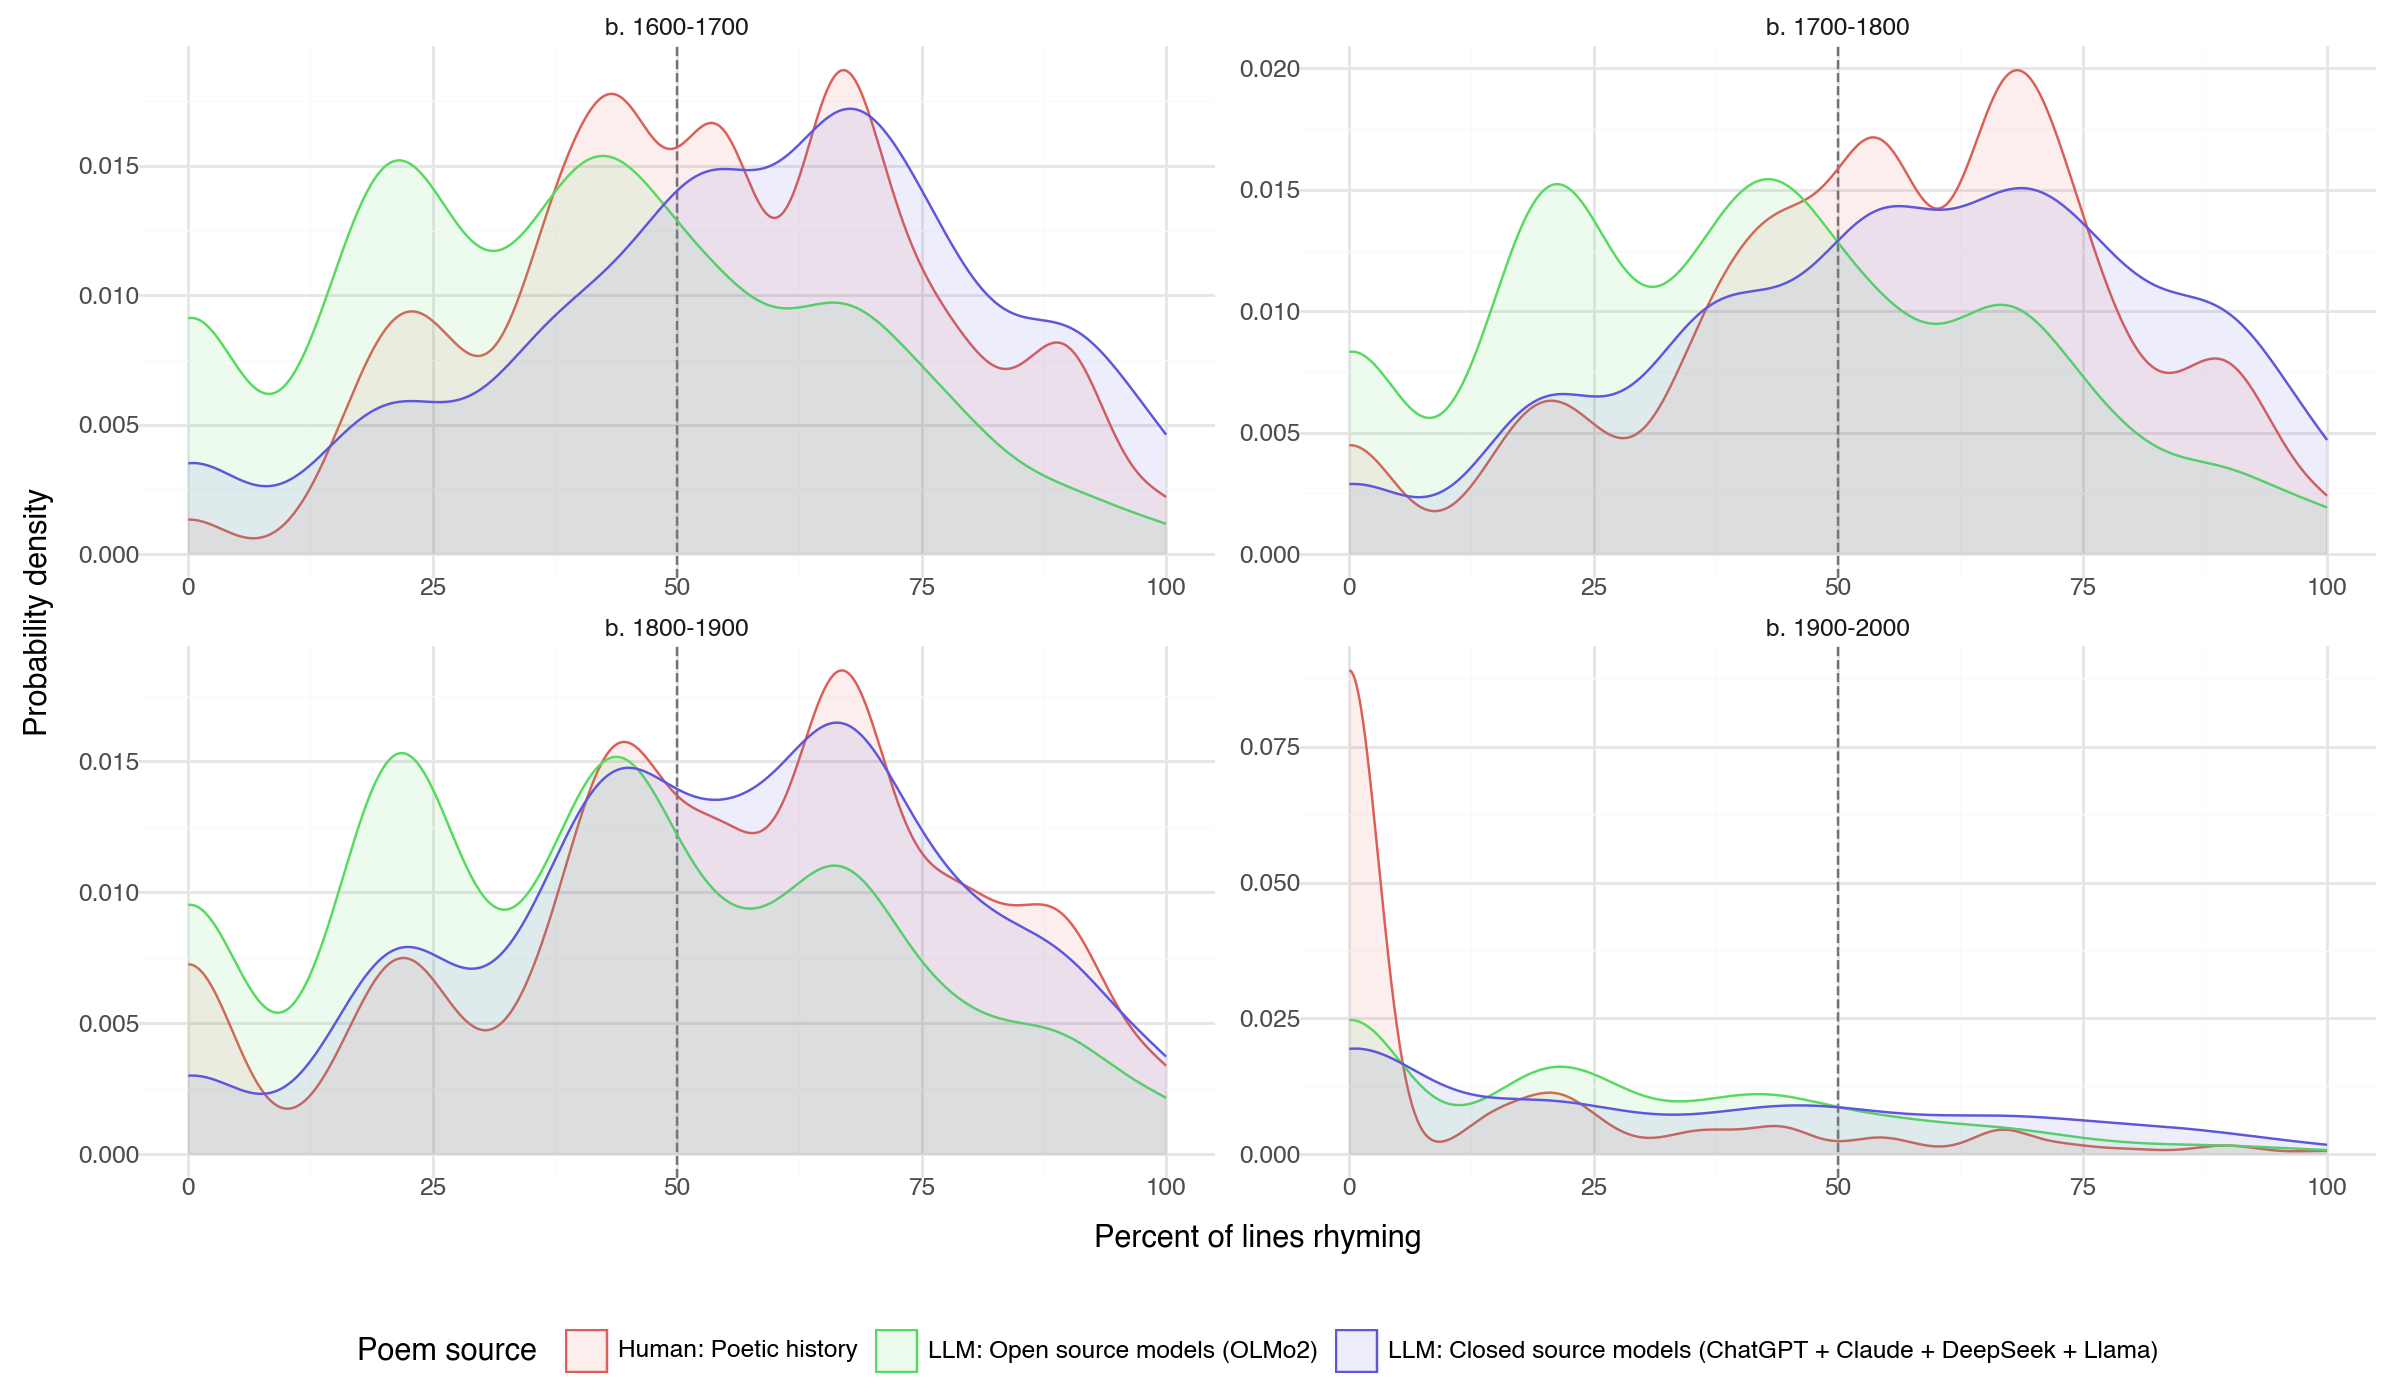

In [60]:
fig = p9.ggplot(figdf, p9.aes(x='value', color='variable', fill='variable'))
fig+= p9.geom_vline(xintercept=50, linetype='dashed', alpha=.5)
# fig+= p9.geom_density(alpha=.1)
fig+= p9.geom_density(p9.aes(y=p9.after_stat('density')), alpha=.1)
# fig+= p9.geom_histogram(alpha=.5, position='identity', bins=20)  # adjust bins as needed
# fig+= p9.geom_freqpoly(alpha=.8, bins=20)
fig+= p9.facet_wrap('ybin', nrow=2, scales='free')
# fig+= p9.facet_grid('model~ybin')
fig+= p9.theme_minimal()
fig+= p9.theme(legend_position='bottom')
fig+= p9.labs(
    y='Probability density',
    x='Percent of lines rhyming',
    color='Poem source',
    fill='Poem source'
)
# fig+= p9.scale_y_continuous(limits=[0.0, 0.05])
fig.save(os.path.expanduser('~/Dropbox/Prof/Data/fig.rhyme_distros_by_century.png'))
fig

In [61]:
# fig = p9.ggplot(figdf, p9.aes(x='value', color='ybin', fill='ybin'))
# fig+= p9.geom_vline(xintercept=50, linetype='dashed', alpha=.5)
# # fig+= p9.geom_density(alpha=.1)
# fig+= p9.geom_density(p9.aes(y=p9.after_stat('density')), alpha=.1)
# # fig+= p9.geom_histogram(alpha=.5, position='identity', bins=20)  # adjust bins as needed
# # fig+= p9.geom_freqpoly(alpha=.8, bins=20)
# fig+= p9.facet_wrap('variable', nrow=1)
# # fig+= p9.facet_grid('model~ybin')
# fig+= p9.theme_minimal()
# fig+= p9.theme(legend_position='bottom')
# fig+= p9.labs(
#     y='Probability',
#     x='Percent of lines rhyming',
#     color='Poem source',
#     fill='Poem source'
# )
# # fig+= p9.scale_y_continuous(limits=[0.0, 0.05])
# fig.save(os.path.expanduser('~/Dropbox/Prof/Data/fig.rhyme_distros_by_model2.png'))
# fig

In [62]:
# odf.groupby(['ybin','model']).size().sort_values()

In [63]:
# p9.options.figure_size=(12,7)
# # figdf = odf[odf.model=='ollama/llama3.1:8b'].groupby('ybin').sample(200).melt(id_vars=['model', 'id','ybin'], value_vars=['perc_rhyming_lines_real', 'perc_rhyming_lines_gen'])
# figdf = odf.melt(id_vars=['model', 'id','ybin'], value_vars=['perc_rhyming_lines_real', 'perc_rhyming_lines_gen'])
# figdf['variable'] = [mdl  if v.endswith('_gen') else 'real' for v,mdl in zip(figdf.variable, figdf.model)]
# figdf = figdf.groupby(['variable','ybin']).sample(250, replace=True)#.drop_duplicates('id')
# # # figdf = figdf[figdf.ybin!="b. 1950-2000"]
# fig = p9.ggplot(figdf, p9.aes(x='value', color='ybin', fill='ybin'))
# fig+= p9.geom_vline(xintercept=50, linetype='dashed', alpha=.5)
# # fig+= p9.geom_density(p9.aes(y=p9.after_stat('density')), alpha=.1)
# fig+= p9.geom_density(p9.aes(y=p9.after_stat('density')), alpha=.1)
# fig+= p9.facet_wrap('variable', nrow=2)
# # fig+= p9.facet_grid('model~ybin')
# fig+= p9.theme_minimal()
# # fig+= p9.scale_y_continuous(limits=[0.0, 0.05])
# fig.save(os.path.expanduser('~/Dropbox/Prof/Data/fig.rhyme_distros_by_model.png'))
# fig

In [126]:
def get_eg_poems(df, max_diff=True, n=1):
    if max_diff is not None:
        df = df.sort_values('perc_rhyming_lines_diff', ascending=not max_diff)
    else:
        df['perc_rhyming_lines_diff_abs'] = df['perc_rhyming_lines_diff'].abs()
        df = df.sort_values('perc_rhyming_lines_diff_abs')
    
    row = df.head(200).sample(1).iloc[0]

    poem_real = [ln.strip()[0].upper() + ln.strip()[1:] if ln.strip() else ln for ln in row.poem_real.split('\n')]
    poem_gen = [ln.strip()[0].upper() + ln.strip()[1:] if ln.strip() else ln for ln in row.poem_gen.split('\n')]

    key_real,key_gen = 'A','B'
    if random.random()>.5:
        poem_real,poem_gen = poem_gen,poem_real
        key_real,key_gen = key_gen,key_real

    # Find the maximum width needed for the real poem
    max_width = max(len(line) for line in poem_real)
    
    print(f"Poem {n}A".ljust(max_width + 4) + f"Poem {n}B")
    # print("-" * (max_width + 4) + "-" * 40)  # Separator line
    
    # Zip the poems together, with empty strings if one is shorter
    for real_line, gen_line in itertools.zip_longest(poem_real, poem_gen, fillvalue=""):
        print(f"{real_line:<{max_width + 4}}{gen_line}")

    
    row_meta = df_meta.loc[row.id]
    key_real_str = f'\t{n}{key_real}: "{row_meta.title.replace('&hyphen;','-')}" by {row_meta.author}'
    key_gen_str = f'\t{n}{key_gen}: AI imitation by {row.model.split('/')[-1]}'

    print()
    if key_real=='A':
        print(key_real_str)
        print(key_gen_str)
    else:
        print(key_gen_str)
        print(key_real_str)
    # return row

get_eg_poems(odf2, max_diff=None)

Poem 1A                                  Poem 1B
When the white fog burns off,            When the white fog burns off,
The abyss of everlasting light           The abyss of everlasting light
Is revealed. The last cobwebs            Is revealed. The last cobwebs
Of fog in the                            Of fog in the
Black firtrees are flakes                Black firtrees are flakes
The black fir's dark limbs unfold        Of white ash in the world's hearth.
                                         
In the silver mist that spreads          Cold of the sea is counterpart
A thousand shades upon the ground        To this great fire. Plunging
Where shadows dance and whisper low      Out of the burning cold of ocean
In a secret language, only known         We enter and ocean of intense
To those who have walked this land       Noon. Sacred salt
Where darkness is the veil of light      Sparkles on our bodies.
                                         
And silence is the voice that's heard    Af

In [131]:
for n in range(5):
    get_eg_poems(odf2[~odf2.model.str.contains('olmo')].query('ybin=="b. 1900-2000"'), max_diff=None, n=n+1)
    print('\n\n')

Poem 1A                                                      Poem 1B
He was cramming in a carrel at Central Library,              He was cramming in a carrel at Central Library,
Leafing his way through Science in History                   Leafing his way through Science in History
                                                             
For a quote to preface his latest thesis                     For a quote to preface his latest thesis
On the impact of wind on suspension bridges.                 On the impact of wind on suspension bridges.
                                                             
Imagine, for example, a tuning-fork                          Imagine, for example, a tuning-fork
Whispering secrets to a bridge's anxious span                Stopped by the action of a stroboscope
                                                             
Like a lover's gentle fingers tracing the pain               Then touched on the rim of a cut glass goblet;
Of fractured cables

In [89]:
row=df_meta.loc['english/wyvillsi/Z200544979']

In [81]:
row.dropna()

Unnamed: 0                                                  187730
_llp_                  chadwyck_poetry|english/wyvillsi/Z200544979
_path            /oak/stanford/groups/malgeehe/data/chadwyck_po...
a1                            Wyvill, Christopher, Sir, 1614-1672?
attautid                                                    2335.0
attbytes                                                       2Kb
attdbase                                            English Poetry
attidref                                                  E2040432
attperi                            Jacobean and Caroline 1603-1660
attpoet                       Wyvill, Christopher, Sir, 1614-1672?
attpubn1                                                    1647.0
attpubn2                                                    1647.0
attrhyme                                                         y
attsize                                                        2Kb
author                        Wyvill, Christopher, Sir, 1614-1